In [20]:
from main import get_reviews_and_sentiment
from llm import openrouter
from datetime import datetime, timezone
from config import finals
from llm.client import reviews_to_pandas
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
llm_client = openrouter.OpenRouter(openrouter.DEVSTRAL_FREE)

from_dt = datetime.strptime('2026-01-01', "%Y-%m-%d").replace(tzinfo=timezone.utc)

product = finals

reviews_with_sentiment = await get_reviews_and_sentiment(
    product, 
    from_dt, 
    llm_client
)   

df = reviews_to_pandas(reviews_with_sentiment)

In [ ]:
df['dt'] = df['created_dt'].dt.date
df['cheating_sentiment'] = df['cheating_sentiment'].apply(lambda c: c.value)

df_summarized = df[['recommendation_id', 'dt', 'cheating_sentiment']]\
    .groupby(['dt', 'cheating_sentiment'])\
    .count()\
    .reset_index()

df_summarized.columns = ['dt', 'cheating_sentiment', 'reviews']

df_summarized = pd.merge(
    left=df_summarized, 
    right=df_summarized[['dt', 'reviews']].groupby('dt').agg(total_reviews = ('reviews', 'sum')).reset_index(),
    on='dt'
)

df_summarized['pct'] = 100*df_summarized['reviews']/df_summarized['total_reviews']

Text(0, 0.5, '% of all reviews that day')

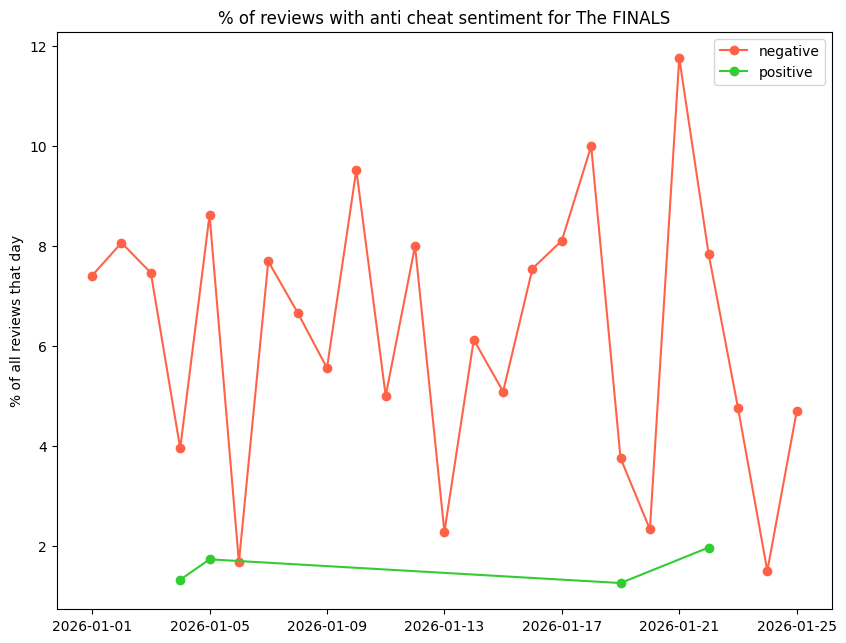

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7.5))
colors = {
    'negative': 'tomato',
    'positive': 'limegreen'
}


for i, sentiment in enumerate(['negative', 'positive']):
    current_data = df_summarized[df_summarized['cheating_sentiment'] == sentiment]
    ax.plot(
        current_data['dt'], 
        current_data['pct'], 
        label=sentiment, 
        color=colors[sentiment], 
        marker='o'
    )

ax.legend(loc='best')
ax.set_title(f'% of reviews with anti cheat sentiment for {finals.name}')
ax.set_ylabel('% of all reviews that day')